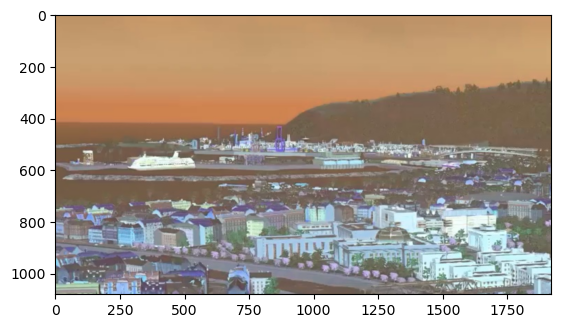

In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

img = cv2.imread(f"frames/f_0.jpg")

def random_homography(width, height, scale=0.2, rotation=7, translation=0.2, scale_min=2.5):
    t_factor = 1 - (1 / scale_min)
    tb_x = (width / 2) * t_factor
    tb_y = (height / 2) * t_factor

    sx = scale_min + np.random.uniform(-scale, scale)
    sy = scale_min + np.random.uniform(-scale, scale)

    angle = np.random.uniform(-rotation, rotation)
    cos_a, sin_a = np.cos(np.radians(angle)), np.sin(np.radians(angle))

    tx = (np.random.uniform(-translation, translation) * width) - tb_x
    ty = (np.random.uniform(-translation, translation) * height) - tb_y

    H_affine = np.array([
        [sx * cos_a, -sin_a, tx],
        [sin_a, sy * cos_a, ty],
        [0, 0, 1]
    ], dtype=np.float32)

    return H_affine

m = random_homography(img.shape[1], img.shape[0])

t_img = cv2.warpPerspective(img, m, (img.shape[1], img.shape[0]))

plt.imshow(t_img)